# INTRODUCTION
* **In this kernel, we will learn how to use seaborn library.**

**Content**

* [Loading the Data Set](#1)
* [Bar Plot](#2)
* [Point Plot](#3)
* [Joint Plot](#4)
* [Pie Chart](#5)
* [Lm Plot](#6)
* [Kde Plot](#7)
* [Box Plot](#8)
* [Swarm Plot](#9)
* [Pair Plot](#10)
* [Count Plot](#11)

<a id="1"></a> <br>
**Loading the Data Set**
* *Reading datas*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['PercentOver25CompletedHighSchool.csv', 'MedianHouseholdIncome2015.csv', 'ShareRaceByCity.csv', 'PoliceKillingsUS.csv', 'PercentagePeopleBelowPovertyLevel.csv']


In [2]:
# Read datas
MedianHouseholdIncome2015 = pd.read_csv('../input/MedianHouseholdIncome2015.csv', encoding="windows-1252")
PercentagePeopleBelowPovertyLevel = pd.read_csv('../input/PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
PercentOver25CompletedHighSchool = pd.read_csv('../input/PercentOver25CompletedHighSchool.csv', encoding="windows-1252")
ShareRaceByCity = pd.read_csv('../input/ShareRaceByCity.csv', encoding="windows-1252")
PoliceKillingsUS = pd.read_csv('../input/PoliceKillingsUS.csv', encoding="windows-1252")

In [3]:
PercentagePeopleBelowPovertyLevel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
Geographic Area    29329 non-null object
City               29329 non-null object
poverty_rate       29329 non-null object
dtypes: object(3)
memory usage: 687.5+ KB


In [4]:
PercentagePeopleBelowPovertyLevel.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10.9     128
10       128
4.4      126
6.3      126
11.5     125
8.3      125
7.9      123
8.7      122
11.1     122
10.2     122
8.6      122
5.9      122
8.8      121
14.3     121
12.8     121
8.5      120
13.5     120
9.1      120
16       118
11.2     118
10.8     118
9.3      118
15.4     118
11.3     117
4.2      117
7.3      117
        ... 
73.7       1
80.2       1
83         1
69.3       1
76.5       1
81.2       1
91.9       1
65.5       1
77.9       1
76.7       1
70.7       1
57.2       1
58.2       1
63.1       1
87.3       1
94.1       1
60.7       1
98.6       1
84.8       1
75         1
80.7       1
68.6       1
73.2       1
87.8       1
88.7       1
50.6       1
67.5       1
65.1       1
68.7       1
84.9       1
Name: poverty_rate, Length: 771, dtype: int64

<a id="2"></a> <br>
**Bar Plot**

Text(0.5, 1.0, 'Poverty Rate Given States')

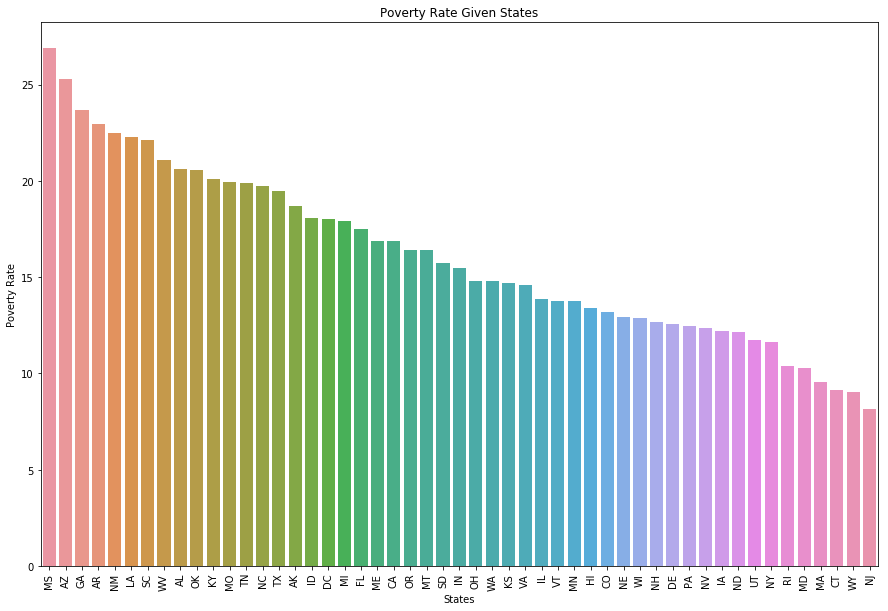

In [5]:
#poverty rate of each state
PercentagePeopleBelowPovertyLevel.poverty_rate.replace(['-'],0.0,inplace=True)
PercentagePeopleBelowPovertyLevel.poverty_rate = PercentagePeopleBelowPovertyLevel.poverty_rate .astype("float") 
area_list = list(PercentagePeopleBelowPovertyLevel["Geographic Area"].unique())
#print(len(area_list))
area_poverty_ratio= []

for i in area_list:
    x = PercentagePeopleBelowPovertyLevel[PercentagePeopleBelowPovertyLevel["Geographic Area"]==i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_poverty_ratio.append(area_poverty_rate)
    
data = pd.DataFrame({'area_list':area_list,'area_poverty_ratio':area_poverty_ratio})
new_index = (data['area_poverty_ratio'].sort_values(ascending=False)).index.values
sorted_data = data.reindex(new_index)


#visualizaiton

plt.figure(figsize=(15,10)) 
sns.barplot(x=sorted_data["area_list"], y = sorted_data["area_poverty_ratio"])
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")

In [6]:
PoliceKillingsUS.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


Text(0.5, 1.0, 'Most Common 15 Name or Surname')

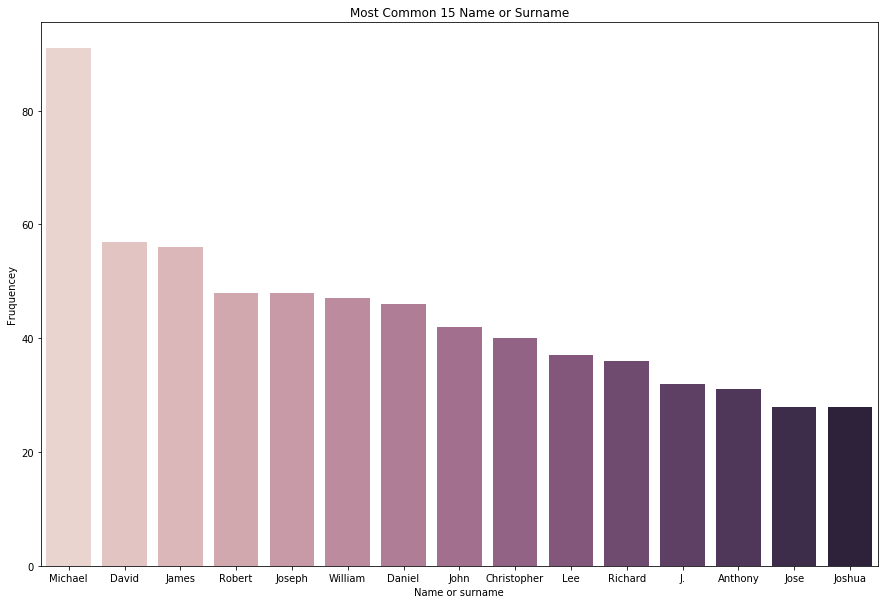

In [7]:
# Most common 15 Name or Surname of killed people
seperate = PoliceKillingsUS.name[PoliceKillingsUS.name != 'TK TK'].str.split()
name1,name2 = zip(*seperate) 
name_list = name1+name2
name_count  = Counter(name_list)
mostCommonName = name_count.most_common(15)
x,y = zip(*mostCommonName)
x,y = list(x),list(y)

plt.figure(figsize=(15,10))
ax = sns.barplot(x=x,y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Name or surname")
plt.ylabel("Fruquencey")
plt.title("Most Common 15 Name or Surname")

In [8]:
PercentOver25CompletedHighSchool.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [9]:
PercentOver25CompletedHighSchool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
91.3     163
89.3     162
93.8     161
93.2     160
92.1     159
92.7     158
91.9     158
92.2     157
90.9     156
93.4     156
89.7     153
91.1     150
89.4     150
93.9     150
90.2     149
91.6     148
91.5     147
92.6     146
88.1     146
93.6     146
89.1     145
90.4     145
94.3     144
89.9     142
89.5     142
        ... 
6.3        1
32.9       1
38.2       1
16.4       1
24.6       1
26         1
51.5       1
32.1       1
7.9        1
36.1       1
13.2       1
50.2       1
21.8       1
44.6       1
40.1       1
54.7       1
52         1
17.9       1
20.6       1
39.7       1
27.5       1
33.1       1
22.4       1
4.5        1
56.2       1
38.8       1
25.5       1
34         1
37.1       1
47.2       1
Name: percent_completed_hs, Length: 728, dtype: int64

**High school graduation rate vs Poverty rate of each state**

Text(0.5, 1.0, 'Graduate Rate Given States')

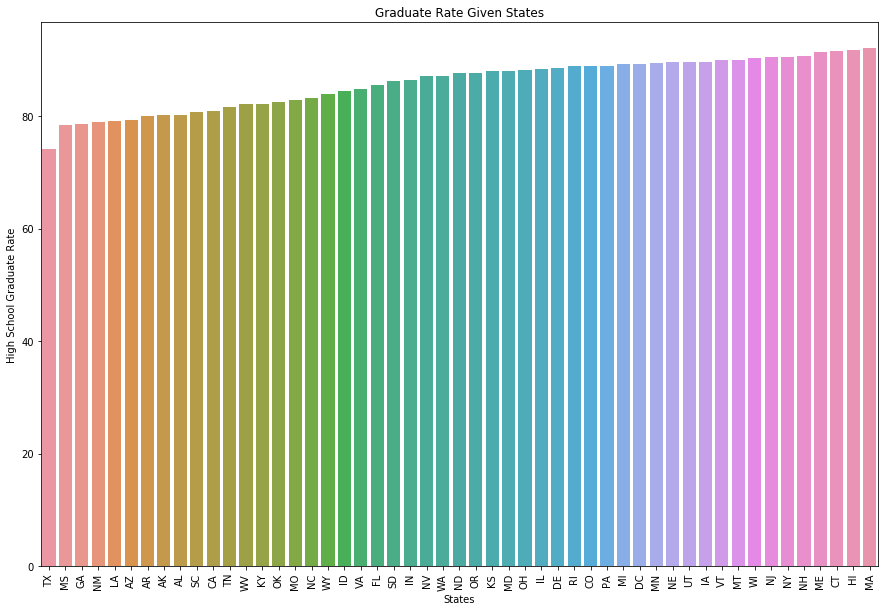

In [10]:
#Graduate rate of each state
PercentOver25CompletedHighSchool.percent_completed_hs.replace(['-'],0.0,inplace=True)
PercentOver25CompletedHighSchool.percent_completed_hs = PercentOver25CompletedHighSchool.percent_completed_hs .astype("float") 
area_list = list(PercentOver25CompletedHighSchool["Geographic Area"].unique())
#print(len(area_list))
area_highschool_ratio = []

for i in area_list:
    x = PercentOver25CompletedHighSchool[PercentOver25CompletedHighSchool["Geographic Area"]==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool_ratio.append(area_highschool_rate) 
    
data = pd.DataFrame({'area_list':area_list,'area_highschool_ratio':area_highschool_ratio})
new_index = (data['area_highschool_ratio'].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)


#visualizaiton

plt.figure(figsize=(15,10)) 
sns.barplot(x=sorted_data2["area_list"], y = sorted_data2["area_highschool_ratio"])
plt.xticks(rotation = 90)
plt.xlabel("States")
plt.ylabel("High School Graduate Rate")
plt.title("Graduate Rate Given States")

In [11]:
 ShareRaceByCity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
Geographic area          29268 non-null object
City                     29268 non-null object
share_white              29268 non-null object
share_black              29268 non-null object
share_native_american    29268 non-null object
share_asian              29268 non-null object
share_hispanic           29268 non-null object
dtypes: object(7)
memory usage: 1.6+ MB


[Text(0, 0.5, 'States'),
 Text(0.5, 0, 'Percentage of Races'),
 Text(0.5, 1.0, "Percentage of State's Population According To Races")]

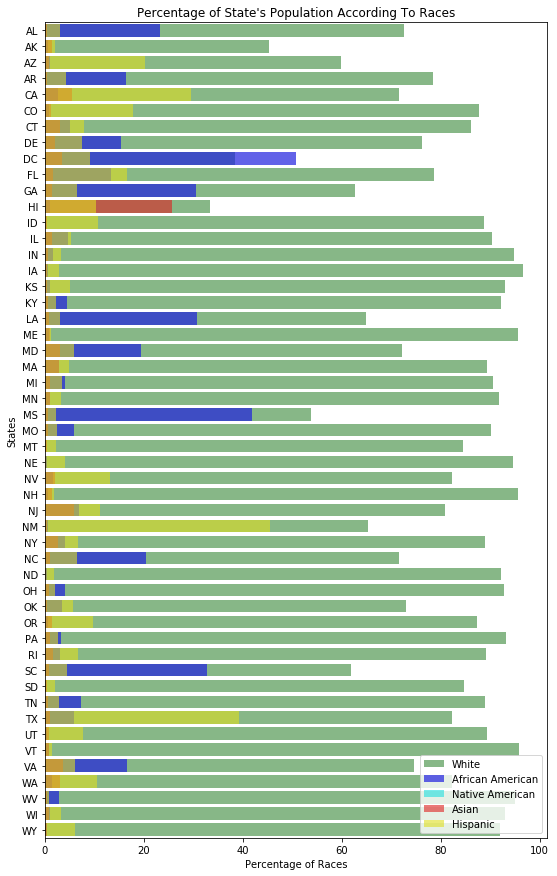

In [12]:
ShareRaceByCity.replace(["-"],0.0,inplace=True)
ShareRaceByCity.replace(["(X)"],0.0,inplace=True)
ShareRaceByCity.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']] = ShareRaceByCity.loc[:,['share_white','share_black','share_native_american','share_asian','share_hispanic']].astype(float)  
area_list = list(ShareRaceByCity["Geographic area"].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []

cont = 0;

for i in area_list:
    cont = cont+1
    x = ShareRaceByCity[ShareRaceByCity['Geographic area'] == i]
    share_white.append(sum(x.share_white) / len(x))
    share_black.append(sum(x.share_black) / len(x))
    share_native_american.append(sum(share_native_american) / len(x))
    share_asian.append(sum(x.share_asian) / len(x))
    share_hispanic.append(sum(x.share_hispanic) / len(x))
    
f,ax = plt.subplots(figsize=(9,15))
sns.barplot(x=share_white, y = area_list, color="green",alpha = 0.5,label = "White")
sns.barplot(x=share_black, y = area_list, color="blue",alpha = 0.7,label = "African American")
sns.barplot(x=share_native_american, y = area_list, color="cyan",alpha = 0.6,label = "Native American")
sns.barplot(x=share_asian, y = area_list, color="red",alpha = 0.6,label = "Asian")
sns.barplot(x=share_hispanic, y = area_list, color="yellow",alpha = 0.6,label = "Hispanic")

ax.legend(loc="lower right",frameon=True)
ax.set(xlabel="Percentage of Races",ylabel="States",title="Percentage of State's Population According To Races")

<a id="3"></a> <br>
**Point Plot**

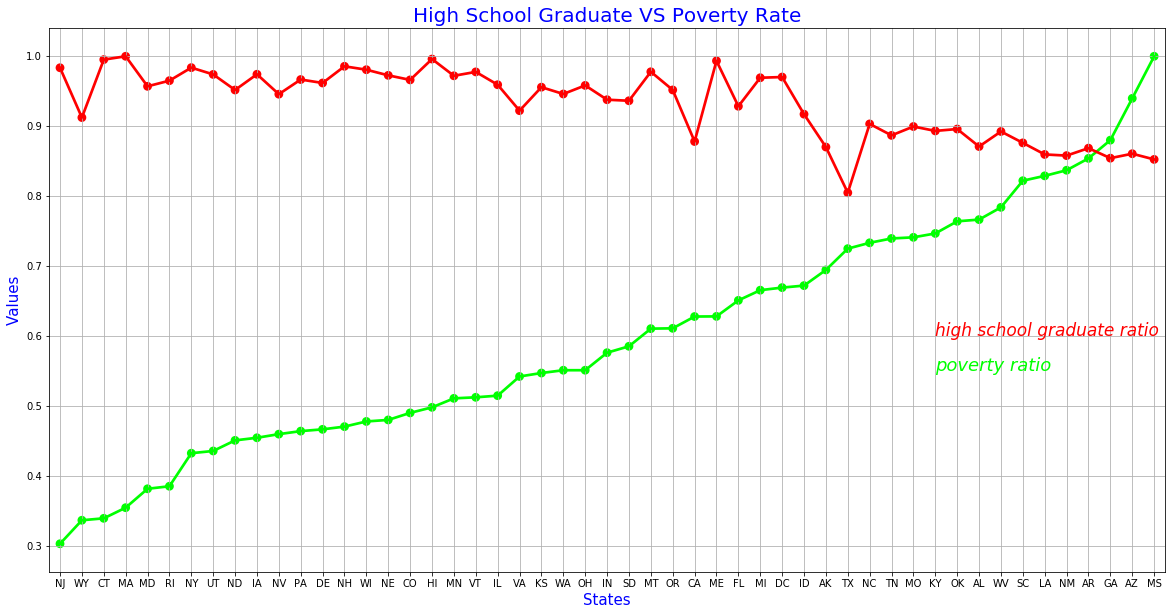

In [13]:
# high school graduation ratio VS poverty rate of each state
sorted_data['area_poverty_ratio'] = sorted_data['area_poverty_ratio'] / max(sorted_data['area_poverty_ratio'])
sorted_data2['area_highschool_ratio'] = sorted_data2['area_highschool_ratio'] / max(sorted_data2['area_highschool_ratio'])
data_Concate = pd.concat([sorted_data,sorted_data2['area_highschool_ratio']],axis=1) 
data_Concate.sort_values('area_poverty_ratio',inplace=True)

f,ax = plt.subplots(figsize=(20,10))
sns.pointplot(x='area_list',y='area_poverty_ratio',data=data_Concate,color='lime',alpha=0.8)
sns.pointplot(x='area_list',y='area_highschool_ratio',data=data_Concate,color='red',alpha=0.8)
plt.text(40,0.6,'high school graduate ratio',color='red',fontsize=17,style='italic')
plt.text(40,0.55,'poverty ratio',color='lime',fontsize=18,style='italic')
plt.xlabel ('States',fontsize = 15,color='blue')
plt.ylabel('Values',fontsize = 15,color='blue')
plt.title('High School Graduate VS Poverty Rate',fontsize = 20, color='blue')
plt.grid()


In [14]:
data_Concate.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


<a id="4"></a> <br>
**Joint Plot**

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


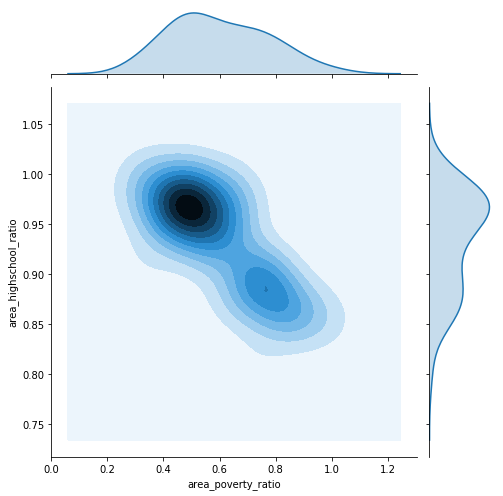

In [15]:
#pearsonr = correlation between variables
#if it is 1 , there is positive correlation , if it is -1 , there is negative correlation
#if it is 0 , there is no correlation
#pdf probability density function
joint = sns.jointplot(data_Concate.area_poverty_ratio , data_Concate.area_highschool_ratio, kind = "kde",size=7)
plt.savefig("graph.png")
plt.show()

/opt/conda/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


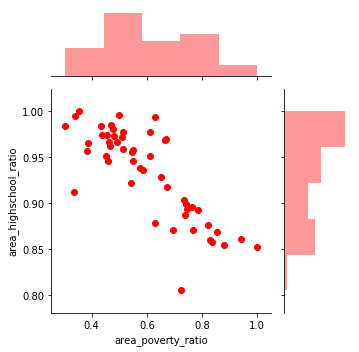

In [16]:
joint = sns.jointplot("area_poverty_ratio","area_highschool_ratio",data = data_Concate ,size = 5 ,ratio = 3, color="r" )

<a id="5"></a> <br>
**Pie Chart**

In [17]:
PoliceKillingsUS.race.head(15)

0     A
1     W
2     H
3     W
4     H
5     W
6     H
7     W
8     W
9     B
10    W
11    B
12    B
13    W
14    B
Name: race, dtype: object

Text(0.5, 1.0, 'Killed people According to Races')

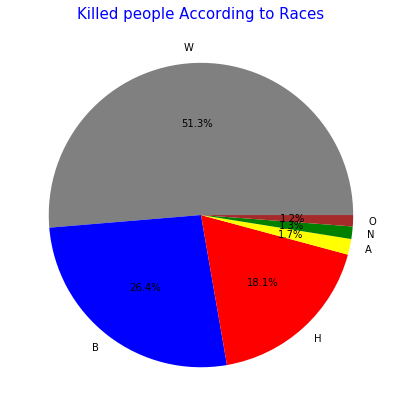

In [18]:
PoliceKillingsUS.race.dropna(inplace=True)
labels = PoliceKillingsUS.race.value_counts().index
colors = ["grey","blue","red","yellow","green","brown"]
explode = [0,0,0,0,0,0]
sizes = PoliceKillingsUS.race.value_counts().values

plt.figure(figsize=(7,7))
plt.pie(sizes,explode = explode, labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Killed people According to Races",color="blue",fontsize=15)

<a id="6"></a> <br>
**Lm Plot**

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


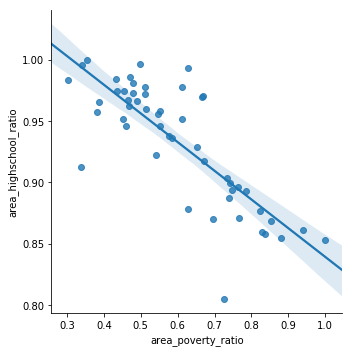

In [19]:
sns.lmplot("area_poverty_ratio","area_highschool_ratio",data = data_Concate)
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


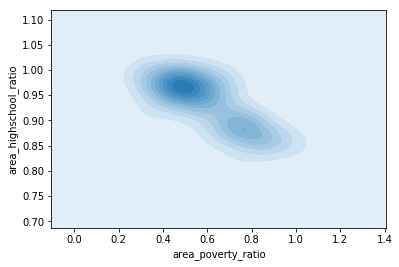

In [20]:
sns.kdeplot(data_Concate.area_poverty_ratio,data_Concate.area_highschool_ratio, shade=True,cut=5)
plt.show()

In [21]:
data_Concate.corr()

,area_poverty_ratio,area_highschool_ratio
area_poverty_ratio,1.000000,-0.805761
area_highschool_ratio,-0.805761,1.000000


<a id="7"></a> <br>
**Kde Plot**

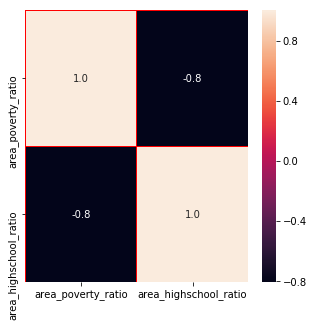

In [22]:
#correlation map - heat map
f,ax = plt.subplots(figsize=(5,5))
sns.heatmap(data_Concate.corr(),annot = True,linewidths = .5,linecolor="red",fmt = '.1f',ax=ax)
plt.show()


<a id="8"></a> <br>
**Box Plot**

In [23]:
PoliceKillingsUS.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


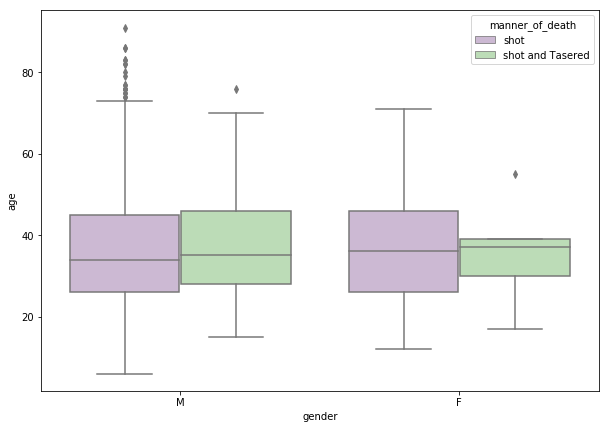

In [24]:
#Manner of Deadth 
plt.figure(figsize=(10,7))
sns.boxplot(x="gender",y="age",hue="manner_of_death",data=PoliceKillingsUS,palette="PRGn")



<a id="9"></a> <br>
**Swarm Plot**

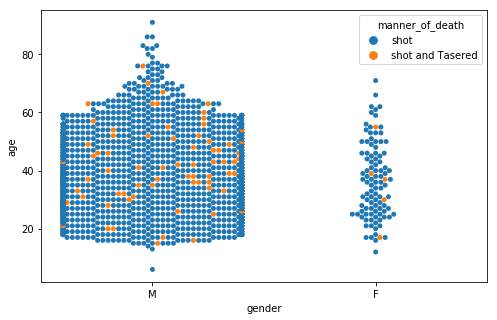

In [25]:
plt.figure(figsize=(8,5))
sns.swarmplot(x="gender",y="age",hue="manner_of_death",data=PoliceKillingsUS)
plt.show()

<a id="10"></a> <br>
**Pair Plot**

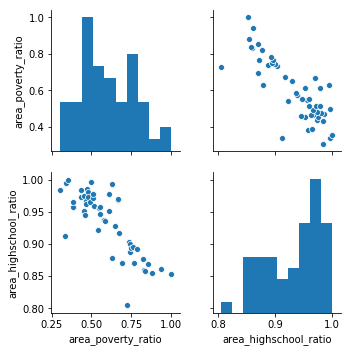

In [26]:
#pair plot
sns.pairplot(data_Concate)
plt.show()

<a id="11"></a> <br>
**Count Plot**

In [27]:
PoliceKillingsUS.manner_of_death.value_counts()

shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64

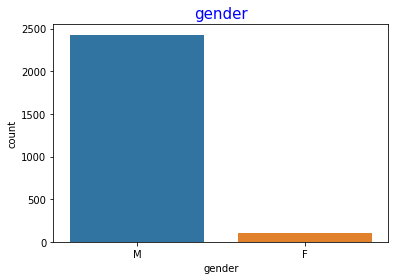

In [28]:
sns.countplot(PoliceKillingsUS.gender)
#sns.countplot(PoliceKillingsUS.manner_of_death)
plt.title("gender",color="blue",fontsize=15)
plt.show()

Text(0.5, 1.0, 'Kill Weapon')

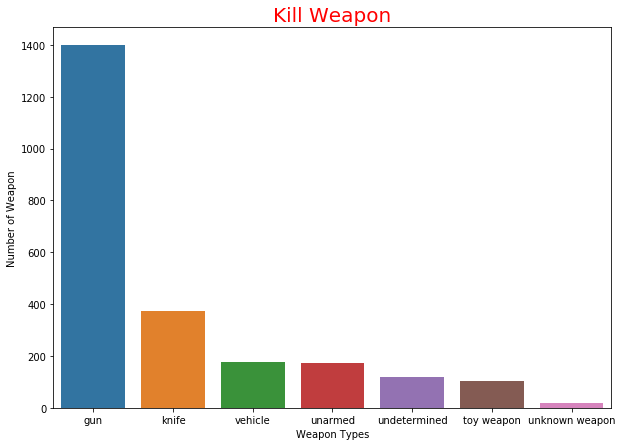

In [29]:
armed = PoliceKillingsUS.armed.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(x=armed[:7].index,y = armed[:7].values)
plt.ylabel("Number of Weapon")
plt.xlabel("Weapon Types")
plt.title("Kill Weapon",color="red",fontsize=20)

Text(0.5, 1.0, 'Age Of Killed people')

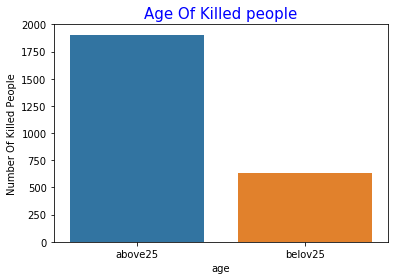

In [30]:
above25 = ["above25" if i>25 else "belov25" for i in PoliceKillingsUS.age]
datafrm = pd.DataFrame({'age':above25})
sns.countplot(x=datafrm.age)
plt.ylabel("Number Of Killed People")
plt.title("Age Of Killed people",color="blue",fontsize=15)

Text(0.5, 1.0, 'Race of killed people')

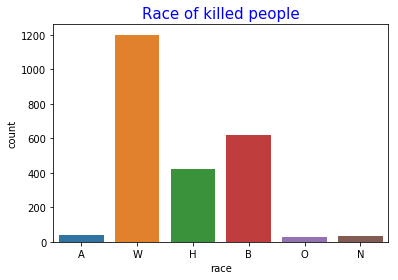

In [31]:
sns.countplot(data=PoliceKillingsUS,x="race")
plt.title("Race of killed people",color="blue",fontsize=15)

Text(0.5, 1.0, 'Most Dangerous cities')

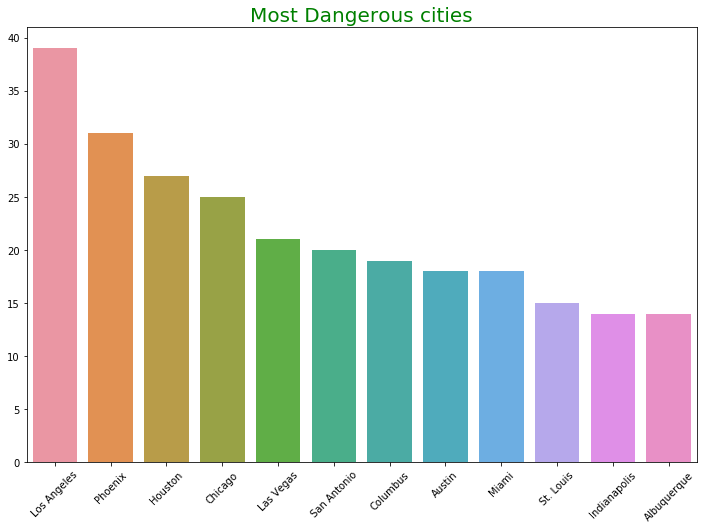

In [32]:
city = PoliceKillingsUS.city.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=city[:12].index,y=city[:12].values)
plt.xticks(rotation=45)
plt.title("Most Dangerous cities",color="green",fontsize=20)